## Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from math import ceil
import scipy

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

%matplotlib inline  

# Defining Paths

In [2]:
path = os.getcwd()
img_width, img_height = 224, 224

train_data_dir = os.path.join(path, r'..\Data\train')
val_data_dir = os.path.join(path, r'..\Data\validation')
test_data_dir = os.path.join(path, r'..\Data\test')

batch_size = 8

# Creating Data Generators

In [3]:
train_datagen = ImageDataGenerator(rescale= 1./255, validation_split=0.2, 
                                   rotation_range=20, zoom_range=0.1, 
                                   width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.1, horizontal_flip=True, fill_mode="nearest")

val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
   train_data_dir,
   target_size=(img_height, img_width),
   batch_size=batch_size,
   class_mode='categorical')

val_generator = test_datagen.flow_from_directory(
   val_data_dir,
   target_size=(img_height, img_width),
   batch_size=batch_size,
   class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
   test_data_dir,
   target_size=(img_height, img_width),
   batch_size=batch_size,
   class_mode='categorical')

Found 233 images belonging to 3 classes.
Found 55 images belonging to 3 classes.
Found 25 images belonging to 3 classes.


# Load and compile pretrained Models

## Learning rate scheduler

In [18]:
initial_learning_rate = 0.001
epochs = 100
decay = initial_learning_rate / epochs

def lr_schedule(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

In [19]:
#create a Callback
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule, verbose=True)

## ResNET-50

In [5]:
model_res50 = applications.ResNet50(weights='imagenet', include_top=False) 
# add a global spatial average pooling layer
x = model_res50.output
x = GlobalAveragePooling2D()(x)

# add a flatten layer
x = Flatten()(x)

# and a fully connected output/classification layer
predictions = Dense(3, activation='softmax')(x)

# create the full network
model_transfer = Model(inputs=model_res50.input, outputs=predictions)

In [6]:
# compile
model_transfer.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(),
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [23]:
# history_pretrained = model_transfer.fit(train_generator, epochs=epochs, shuffle = True, verbose = 1, validation_data = val_generator, callbacks=[lr_callback])

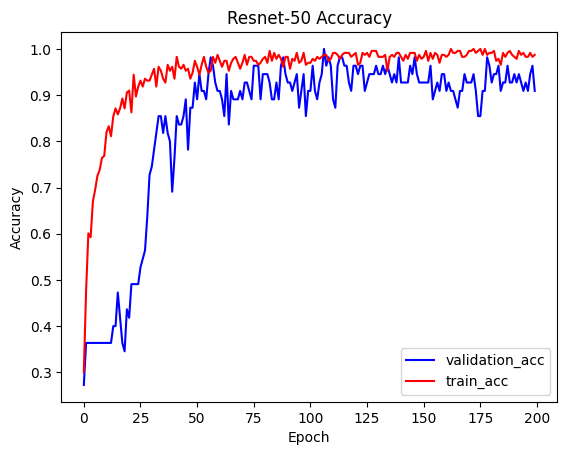

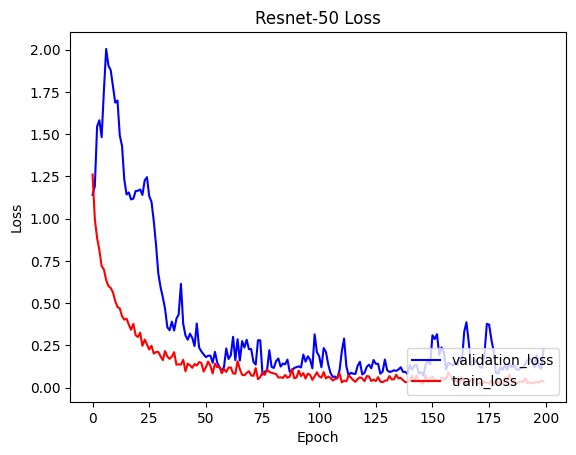

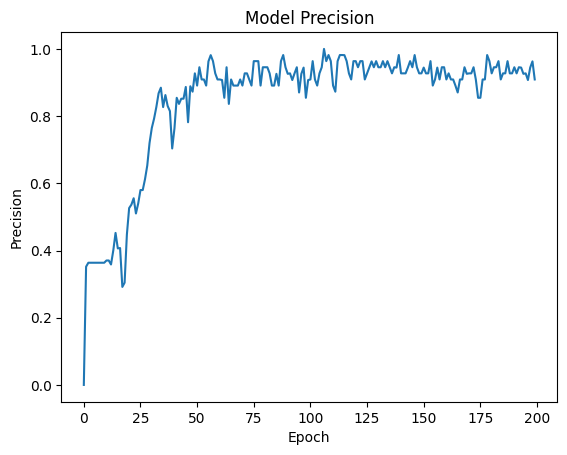

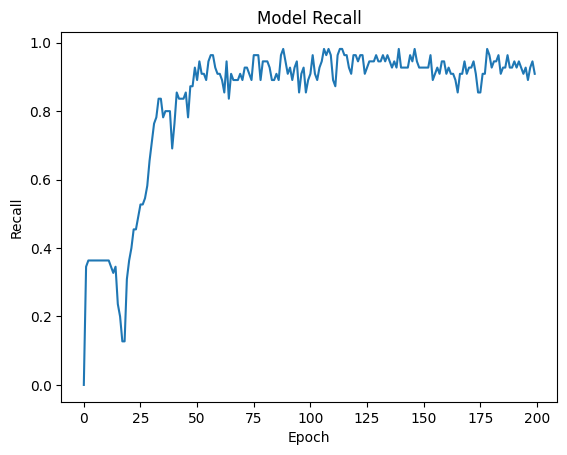

In [24]:
# summarize history for accuracy
plt.plot(history_pretrained.history['val_accuracy'], "-b", label="validation_acc")
plt.plot(history_pretrained.history['accuracy'], "-r", label="train_acc")
plt.title('Resnet-50 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

# summarize history for loss
plt.plot(history_pretrained.history['val_loss'], "-b", label="validation_loss")
plt.plot(history_pretrained.history['loss'], "-r", label="train_loss")
plt.title('Resnet-50 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

# summarize history for precision
plt.plot(history_pretrained.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.show()

# summarize history for recall
plt.plot(history_pretrained.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.show()

In [9]:
model_transfer.evaluate(test_generator)

4/4 [==============================] - 2s 388ms/step - loss: 1.1686 - accuracy: 0.6800 - recall: 0.6800 - precision: 0.7391


[1.1686089038848877, 0.6800000071525574, 0.6800000071525574, 0.739130437374115]

## VGG-16

In [10]:
model_vgg16 = applications.VGG16(weights='imagenet', include_top=False)
# add a global spatial average pooling layer
x = model_vgg16.output
x = GlobalAveragePooling2D()(x)

# add a flatten layer
x = Flatten()(x)

# and a fully connected output/classification layer
predictions = Dense(3, activation='softmax')(x)

# create the full network
model_transfer_vgg = Model(inputs=model_vgg16.input, outputs=predictions)

In [11]:
# compile
model_transfer_vgg.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(),
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [12]:
history_pretrained_vgg = model_transfer_vgg.fit(train_generator, epochs=epochs, shuffle = True, verbose = 1, validation_data = val_generator, , callbacks=[lr_callback])

Epoch 1/200
30/30 [==============================] - 130s 4s/step - loss: 1.1300 - accuracy: 0.3391 - recall_1: 0.0429 - precision_1: 0.4000 - val_loss: 1.0717 - val_accuracy: 0.4182 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 2/200
30/30 [==============================] - 130s 4s/step - loss: 1.0480 - accuracy: 0.4721 - recall_1: 0.0043 - precision_1: 1.0000 - val_loss: 1.0542 - val_accuracy: 0.4909 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 3/200
30/30 [==============================] - 129s 4s/step - loss: 1.0048 - accuracy: 0.5622 - recall_1: 0.0129 - precision_1: 1.0000 - val_loss: 1.0374 - val_accuracy: 0.4909 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 4/200
30/30 [==============================] - 129s 4s/step - loss: 0.9832 - accuracy: 0.5193 - recall_1: 0.0901 - precision_1: 0.6000 - val_loss: 1.0531 - val_accuracy: 0.4000 - val_recall_1: 0.1273 - val_precision_1: 0.5833
Epoch 5/200
30/30 [=============================

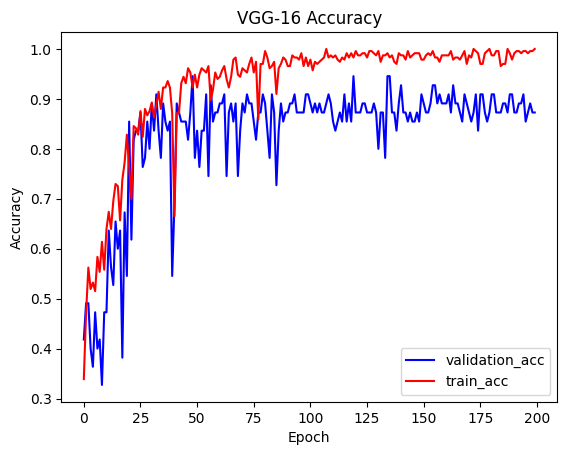

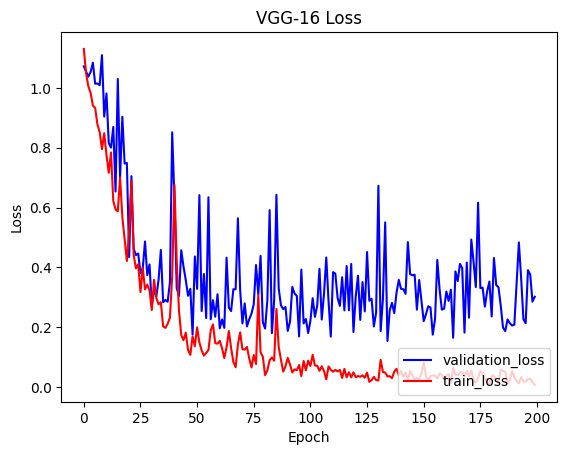

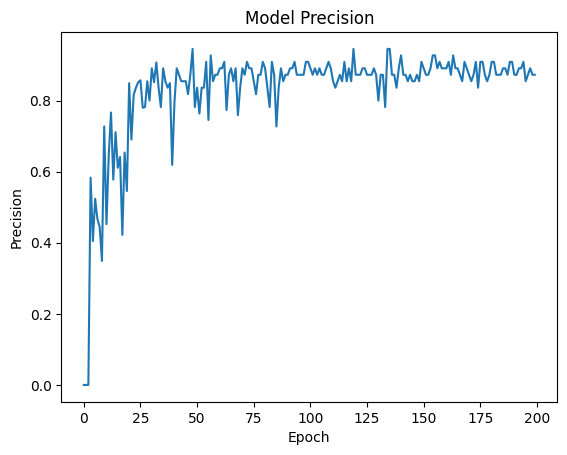

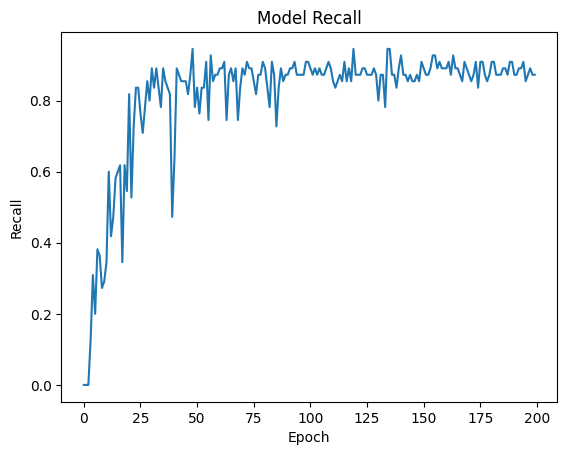

In [25]:
# summarize history for accuracy
plt.plot(history_pretrained_vgg.history['val_accuracy'], "-b", label="validation_acc")
plt.plot(history_pretrained_vgg.history['accuracy'], "-r", label="train_acc")
plt.title('VGG-16 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

# summarize history for loss
plt.plot(history_pretrained_vgg.history['val_loss'], "-b", label="validation_loss")
plt.plot(history_pretrained_vgg.history['loss'], "-r", label="train_loss")
plt.title('VGG-16 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

# summarize history for precision
plt.plot(history_pretrained_vgg.history['val_precision_1'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.show()

# summarize history for recall
plt.plot(history_pretrained_vgg.history['val_recall_1'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.show()

In [15]:
model_transfer_vgg.evaluate(test_generator)

4/4 [==============================] - 2s 488ms/step - loss: 1.4939 - accuracy: 0.6400 - recall_1: 0.6400 - precision_1: 0.6400


[1.4939368963241577,
 0.6399999856948853,
 0.6399999856948853,
 0.6399999856948853]

# Saving Model

In [16]:
model_path = './../Trained_Model/model_resnet.h5'
model_transfer.save(model_path)

In [17]:
model_path_vgg = './../Trained_Model/model_vgg.h5'
model_transfer_vgg.save(model_path_vgg)